In [ ]:
# Dominik Csatári | FV1TW4 | 2024.01.09.
# My Kaggle User is: Dominik Csatári | https://www.kaggle.com/dominikcsatri
# For the codes, I've created are highly contributed wiht general documentation code
# from https://scikit-learn.org  as this is where I have learned, how to use, each
# type of estimator, or what hyperparemeters can be tuned, what libraries are recommended to use.

#Set random_seed:
random_seed = 42

In [16]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import csv
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [8]:
# At this part i read in the files.
X = pd.read_csv('pc_X_train.csv')
Final_X_test = pd.read_csv('pc_X_test.csv')
Y = pd.read_csv('pc_y_train.csv')
X = X.drop(X.columns[0], axis=1)
Final_x_test = Final_X_test.drop(Final_X_test.columns[0], axis=1)

# Split oour data for training and testing our model
random_seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y['score'], test_size=0.2, random_state=random_seed)


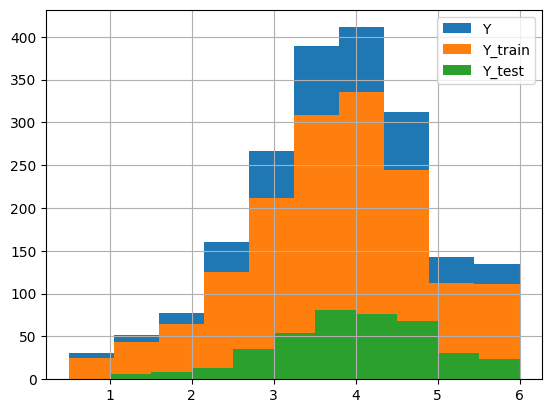

In [9]:
# This figure represent the distribution of y values in the test and train set and Y set.
plt.figure()
Y['score'].hist(label='Y')
Y_train.hist(label='Y_train')
Y_test.hist(label='Y_test')

plt.legend(loc='upper right')
plt.show()


In [5]:
# This function is for writing out our final predicted y to a file for later upload
def WriteOutput(data,file_path="output.csv"):
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        writer.writerow(['id', 'score'])
        
        for idx, score in enumerate(data):
            writer.writerow([idx, score])

In [31]:
# This is where I check if there is any missing values, there were none.
print(np.isnan(X_train).any()==True)
print(np.isinf(X_train).any())

mean_down_time              False
std_down_time               False
max_down_time               False
sum_down_time               False
mean_up_time                False
                            ...  
change_14_mean              False
change_14_std               False
count_action_time_grade2    False
max_cursor_grade2           False
max_word_count_grade2       False
Length: 468, dtype: bool
mean_down_time              False
std_down_time               False
max_down_time               False
sum_down_time               False
mean_up_time                False
                            ...  
change_14_mean              False
change_14_std               False
count_action_time_grade2    False
max_cursor_grade2           False
max_word_count_grade2       False
Length: 468, dtype: bool


In [15]:
# In this part I create the PCA transformation, with the scaled set.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



prec = 0.3
n_components = int(np.floor(X.shape[1]*prec))

pca = PCA(n_components='mle',svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)

# Use the transformed data for further analysis or modeling
X_test_pca = pca.transform(X_test_scaled)

In [7]:
# This is where I compare it with the original, to see how many dimensions could we decrease.
print("Original:")
print(X.shape[1])
print("PCA mle coded:")
print(X_train_pca.shape[1])


Original:
468
PCA mle coded:
349


I have tried with various amount of columns, with trial and error to see coharance. With 49 column it still gave a great result, with knn and random forest as well, rmse being below 0.7 . treshold to variance is at 1.

In [113]:
X_train_pca.shape

(1580, 49)

In [124]:
#Thi is a randomforest model fitted on the pca set
rf_model = RandomForestRegressor(n_estimators=80, random_state=42)

# Train the model on the training set
rf_model.fit(X_train_pca, Y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test_pca)



In [125]:

mse_varSelected = mean_squared_error( Y_test, y_pred, squared=False)
mse_varSelected

0.6797452046502053

In [8]:
# This code part is written by me assisted with ChatGBT
# there is sklearn libary for it, which I already used,
# but for me it was easier to work with.
import numpy as np
#0 0.001, 0.01, 0.1, 1, 10
def drop_low_variance_columns(X_train_pca, threshold=0.001):
    Dropped = []
    
    # Calculate the variance for each column
    variances = np.var(X_train_pca, axis=0)
    
    # Identify columns with variance below the threshold
    low_variance_columns = np.where(variances < threshold)[0]
    
    # Drop low variance columns and store the column numbers in 'Dropped'
    X_train_pca = np.delete(X_train_pca, low_variance_columns, axis=1)
    Dropped.extend(low_variance_columns)

    print("Remaining Features:", X_train_pca.shape)
    return X_train_pca, Dropped




X_train_pca, Dropped = drop_low_variance_columns(X_train_pca)

print("Dropped columns:", Dropped)


Remaining Features: (1580, 229)
Dropped columns: [229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348]


In [9]:
# Here you delete feature from the test set as well
X_test_pca = np.delete(X_test_pca, Dropped, axis=1)


In [ ]:
# This part I create a Final_X prediciton for kaggle upload, with the dataset
# having reduced its dimension with pca and by variance hreshold as well.

X_final_scaled = scaler.fit_transform(Final_x_test)
X_Final = pca.transform(X_final_scaled)
asd = np.delete(X_Final, Dropped, axis=1)

print(X_Final.all() == asd.all())
Final_pred = rf_model.predict(asd)
WriteOutput(Final_pred,"RandomForest_PCA3.csv")

KNN with PCA

In [123]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=50,algorithm='auto',weights='distance')
neigh.fit(X_train_pca, Y_train)
y_pred = neigh.predict(X_test_pca)
mse_KNN = mean_squared_error( Y_test, y_pred)
rmse_KNN = np.sqrt(mse_KNN)

print(rmse_KNN)

0.6795972559101549


SVM for dropped columns

In [127]:
# Here I do the grid search for SVR as well with having one mor dimension, the variance.

reg_numb = 30;
eps_values = 20;

regularization = np.linspace(0.008,1,reg_numb)
epsilon_value = np.linspace(0.1,0.8,eps_values)

Models_res = np.zeros((reg_numb, eps_values))
Models = []

for i in range(len(regularization)):
    for j in range(len(epsilon_value)):
        regr = svm.SVR(C=regularization[i],epsilon=epsilon_value[j])

        Models.append(regr)
        regr.fit(X_train_pca, Y_train)
        y_pred=regr.predict(X_test_pca)
        mse_SVM = mean_squared_error( Y_test, y_pred)
        Models_res[i][j] = mse_SVM

In [128]:
min_index = np.unravel_index(np.argmin(Models_res, axis=None), Models_res.shape)
print(min_index)
print(Models_res[min_index])
print(tabulate(Models_res))

(13, 11)
0.4322714367724334
--------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------
0.612624  0.613848  0.614714  0.613532  0.613543  0.615625  0.617952  0.622826  0.626826  0.63244   0.63781   0.641899  0.643089  0.645203  0.644193  0.648014  0.652638  0.653344  0.66223   0.668075
0.483872  0.484691  0.488385  0.487467  0.487482  0.489012  0.490012  0.490583  0.491191  0.489895  0.489807  0.48911   0.491856  0.491929  0.491015  0.492137  0.494295  0.494145  0.496232  0.499953
0.463054  0.463957  0.466261  0.46517   0.465095  0.465019  0.465136  0.466843  0.465715  0.465857  0.466826  0.465762  0.465948  0.466137  0.467688  0.469614  0.471448  0.47231   0.472715  0.473739
0.454247  0.45579   0.455174  0.452419  0.452454  0.450711  0.452289  0.455493  0.453675  0.454855  0.454846  0.45352   0.455771  0.456363  0.456362  0.45906   0.460441  0.4600

In [133]:
# Estimating with the best model I found with grid search
ind = (min_index[0]-1)*reg_numb+min_index[1]
Best_SVM_Model = Models[ind]
print(Models_res[min_index[0]][min_index[1]])

0.4322714367724334


Now let's try for different variances:

In [176]:

reg_numb = 30;
eps_values = 20;

# Hyper parameters to be tuned:
regularization = np.linspace(0.008,1,reg_numb)
epsilon_value = np.linspace(0.1,0.8,eps_values)
thresholds = [0, 0.001, 0.01, 0.1, 1, 10, 20]


Models_res = np.zeros((len(thresholds),reg_numb, eps_values))
Models = []

X_train_pca, Dropped = drop_low_variance_columns(X_train_pca)
X_test_pca = np.delete(X_test_pca, Dropped, axis=1)

for z in range(len(thresholds)):

    X_train_pca, Dropped = drop_low_variance_columns(X_train_pca,threshold=thresholds[z])
    X_test_pca = np.delete(X_test_pca, Dropped, axis=1)

    for i in range(len(regularization)):
        for j in range(len(epsilon_value)):
            regr = svm.SVR(C=regularization[i],epsilon=epsilon_value[j])

            Models.append(regr)
            regr.fit(X_train_pca, Y_train)
            y_pred=regr.predict(X_test_pca)
            mse_SVM = mean_squared_error( Y_test, y_pred)
            Models_res[z][i][j] = mse_SVM


Remaining Features: (1580, 349)
Remaining Features: (1580, 349)
Remaining Features: (1580, 229)
Remaining Features: (1580, 177)
Remaining Features: (1580, 103)
Remaining Features: (1580, 49)
Remaining Features: (1580, 8)
Remaining Features: (1580, 5)


In [180]:
# SO for different variances this is the best model and best estimation
min_index = np.unravel_index(np.argmin(Models_res, axis=None), Models_res.shape)
print(min_index)
print(Models_res[min_index])
print(tabulate(Models_res))

(1, 29, 7)
0.4114847111925296
------------------------------------------------------------------  ------------------------------------------------------------------  ------------------------------------------------------------------  ------------------------------------------------------------------  ------------------------------------------------------------------  ------------------------------------------------------------------  ------------------------------------------------------------------  ------------------------------------------------------------------  ------------------------------------------------------------------  ------------------------------------------------------------------  ------------------------------------------------------------------  ------------------------------------------------------------------  ------------------------------------------------------------------  ------------------------------------------------------------------  ------------------

C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tabulate\__init__.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (len(row) >= 1 and row[0] == SEPARATING_LINE)
C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tabulate\__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


In [183]:
ind = (min_index[0]-1)*reg_numb+min_index[1]
ind = min_index[0] * (eps_values * reg_numb) + min_index[1] * eps_values + min_index[2]
Best_SVM_Model = Models[ind]
print(Best_SVM_Model)
print(Models_res[min_index[0]][min_index[1]][min_index[2]])

SVR(epsilon=0.35789473684210527)
0.4114847111925296


In [189]:

y_pred=Best_SVM_Model.predict(X_test_pca)
mse_SVM = mean_squared_error( Y_test, y_pred)
print(mse_SVM)

0.4114847111925296


In [190]:
X_final_scaled = scaler.fit_transform(Final_x_test)
X_Final = pca.transform(X_final_scaled)
Final = np.delete(X_Final, Dropped, axis=1)


Final_pred = Best_SVM_Model.predict(Final)
WriteOutput(Final_pred,"SVM_variance_threshold.csv")


It gave a result of 0.41 in test set, and uploaded was 0.684.

Adaboost on modified data. It gave a great result before. now see if it's the same for reduced dims 

In [191]:
from sklearn.ensemble import AdaBoostRegressor

In [208]:
# This had the best value according to grid search in firt assignment:
# AdaBoostRegressor(learning_rate=0.31103448275862067, n_estimators=81, random_state=42) 
AdaBoost = AdaBoostRegressor(random_state=42, n_estimators=150, learning_rate = 0.1)


AdaBoost.fit(X_train_pca, Y_train)

y_pred = AdaBoost.predict(X_test_pca)
mse_ada = mean_squared_error( Y_test, y_pred)
rmse_ada = np.sqrt(mse_ada)
print(rmse_ada)

0.716160877624121


XGBoost with reduced features:

In [218]:
# This is XGBoost trying out with different values:
from xgboost import XGBRegressor

learn = XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 20)
learn.fit(X_train_pca, Y_train)

y_pred = learn.predict(X_test_pca)
mse_xb = mean_squared_error( Y_test, y_pred)
print(mse_xb)

0.5702304891182882


Data analysis

In [46]:
X.describe()

,mean_down_time,std_down_time,max_down_time,sum_down_time,mean_up_time,std_up_time,max_up_time,sum_up_time,mean_length_activity,std_length_activity,...,change_12_std,change_13_count,change_13_mean,change_13_std,change_14_count,change_14_mean,change_14_std,count_action_time_grade2,max_cursor_grade2,max_word_count_grade2
count,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1976.000000,1976.000000,...,1976.00000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,7.688269e+05,4.189786e+05,1.769309e+06,2.683359e+09,7.689267e+05,4.189778e+05,1.769519e+06,2.683691e+09,6.139294,2.320964,...,0.00521,0.466093,0.000176,0.003841,0.334514,0.000095,0.003490,6.278846,6.941802,7.343117
std,2.951297e+05,1.098840e+05,2.919217e+05,1.746426e+09,2.951277e+05,1.098823e+05,2.919109e+05,1.746537e+09,0.709091,0.561703,...,0.01111,2.149799,0.000937,0.012668,1.044791,0.000311,0.009115,3.129068,3.207926,3.381960
min,1.168521e+05,6.362678e+04,2.294520e+05,5.924404e+07,1.169387e+05,6.363192e+04,2.295480e+05,5.928792e+07,5.089888,0.688038,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,6.186022e+05,3.615599e+05,1.754355e+06,1.529142e+09,6.187072e+05,3.615575e+05,1.754539e+06,1.529309e+09,5.693386,1.924295,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,5.000000
50%,7.781720e+05,4.348499e+05,1.792134e+06,2.297854e+09,7.782541e+05,4.348501e+05,1.792226e+06,2.298282e+09,5.969028,2.230252,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000,7.000000
75%,9.135849e+05,4.878461e+05,1.807127e+06,3.440400e+09,9.136952e+05,4.878417e+05,1.807279e+06,3.440644e+09,6.354988,2.617704,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,9.000000,9.000000
max,7.897552e+06,1.545223e+06,8.313630e+06,2.424430e+10,7.897639e+06,1.545218e+06,8.313707e+06,2.424494e+10,10.831017,3.966525,...,0.06710,44.000000,0.022941,0.149753,14.000000,0.003294,0.057316,25.000000,26.000000,26.000000


In [47]:
X.corr()

,mean_down_time,std_down_time,max_down_time,sum_down_time,mean_up_time,std_up_time,max_up_time,sum_up_time,mean_length_activity,std_length_activity,...,change_12_std,change_13_count,change_13_mean,change_13_std,change_14_count,change_14_mean,change_14_std,count_action_time_grade2,max_cursor_grade2,max_word_count_grade2
mean_down_time,1.000000,0.555150,0.656763,0.568564,1.000000,0.555144,0.656693,0.568539,0.138443,0.110729,...,-0.020443,0.034924,0.027383,0.043841,0.039273,0.023359,0.017603,0.171527,0.076527,0.065505
std_down_time,0.555150,1.000000,0.481959,0.585829,0.555148,1.000000,0.481907,0.585819,0.174909,0.138333,...,0.038470,0.048343,0.027077,0.041591,0.069972,0.023143,0.041216,0.355793,0.242255,0.237516
max_down_time,0.656763,0.481959,1.000000,0.407422,0.656766,0.481964,0.999987,0.407405,0.071394,0.072326,...,0.008101,0.017053,0.010227,0.015692,0.027160,0.023189,0.017974,0.116025,0.056769,0.050014
sum_down_time,0.568564,0.585829,0.407422,1.000000,0.568554,0.585827,0.407496,1.000000,0.325597,0.223625,...,0.062847,-0.006384,-0.056131,-0.039973,0.151851,0.024989,0.078785,0.853661,0.639056,0.613803
mean_up_time,1.000000,0.555148,0.656766,0.568554,1.000000,0.555142,0.656695,0.568529,0.138423,0.110711,...,-0.020443,0.034927,0.027385,0.043844,0.039270,0.023359,0.017601,0.171515,0.076522,0.065500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
change_14_mean,0.023359,0.023143,0.023189,0.024989,0.023359,0.023147,0.023141,0.024989,0.043685,0.063351,...,0.013714,0.014912,0.016979,0.045386,0.887876,1.000000,0.936285,0.024584,0.009170,0.001588
change_14_std,0.017603,0.041216,0.017974,0.078785,0.017601,0.041221,0.017947,0.078787,0.050400,0.065568,...,0.040411,0.016514,0.014993,0.042423,0.898406,0.936285,1.000000,0.097645,0.074541,0.067195
count_action_time_grade2,0.171527,0.355793,0.116025,0.853661,0.171515,0.355797,0.116179,0.853682,0.310117,0.218403,...,0.083511,-0.029040,-0.090417,-0.075983,0.178525,0.024584,0.097645,1.000000,0.820041,0.797884
max_cursor_grade2,0.076527,0.242255,0.056769,0.639056,0.076522,0.242260,0.057039,0.639083,-0.120791,-0.143867,...,0.077527,-0.052304,-0.100270,-0.101339,0.133315,0.009170,0.074541,0.820041,1.000000,0.972163


In [48]:
import sweetviz as sv

C:\Users\csata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
train_report = sv.analyze(X_train,pairwise_analysis='off')
train_report.show_html('train_report.html', open_browser=False)

[Summarizing dataframe]                      |          | [  0%]   00:00 -> (? left)

Feature: max_word_count_grade2               |██████████| [100%]   07:02 -> (00:00 left)                     


Report train_report.html was generated.


In [18]:
# Sklearn GradientBoostingRegressor method which is a bit different than xgboost, as it might be slower, but still I avhe implemented it
gbt = GradientBoostingRegressor()
gbt.fit(X_train, Y_train)


sfm = SelectFromModel(gbt, threshold=0.1)
sfm.fit(X_train, Y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

gbt = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gbt.fit(X_train_selected, Y_train)

y_pred = gbt.predict(X_test_selected)

rmse = mean_squared_error(Y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')



Root Mean Squared Error: 0.9371527713737507


In [ ]:
mse_varSelected = mean_squared_error( Y_test, y_pred)
mse_varSelected

XBoost

In [12]:
xb_model = XGBRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 20)

xb_model.fit(X_train_pca, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
y_pred = xb_model.predict(X_test_pca)
mse = mean_squared_error(Y_test, y_pred)
mse

0.5700900788535235